In [ ]:
#Leitura de dados
import pandas as pd 

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Trnsformação dos dados
from sklearn.preprocessing import StandardScaler

#Algorítimo a ser usado para o cluster dos clientes
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

#Para diminuir a dimensionalidade da base de dados
from sklearn.decomposition import PCA


#Metodo para avaliação do cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [3]:
df = pd.read_csv("../Dados/Dados de clientes tratados.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Como os dados estão em escalas diferentes, vai ser preciso de uma transformação deles antes de passa-los para os modelos de cluster, para isso irei utilizar o StandardScaler que irá escalar todos os dados e deixa-los prontos para a clusterização!

In [4]:
transformadorDados = StandardScaler()
dfTransformado = transformadorDados.fit_transform(df)
dfCluster = pd.DataFrame(dfTransformado, columns = df.columns)
dfCluster.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.744972,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,-1.744582,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,-1.744192,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-1.743413,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,-1.743023,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Agora com os dados transformados, já posso passa-los para os modelos, mas antes irei utilizar o PCA para diminuir a dimensionalidade da base de dados:

O PCA (Análise de Componentes Principais) é uma técnica eficaz para reduzir a dimensionalidade da base de dados, transformando variáveis correlacionadas em componentes principais independentes. Isso ajuda a eliminar redundâncias, simplificar os dados e destacar os padrões mais relevantes. No contexto do projeto de clustering, o PCA melhora o desempenho ao reduzir o ruído nos dados e facilita a identificação de grupos, tornando a análise mais clara e os clusters mais precisos.

In [8]:
scaler = StandardScaler()
dfScalared = scaler.fit_transform(df)

# PCA
pca = PCA()
pca.fit(dfScalared)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# Exibindo a variância explicada por cada componente
for i, (var, cum_var) in enumerate(zip(explained_variance, explained_variance_cumulative), 1):
    print(f"Componente {i}: Variância explicada = {var:.2%}, Variância acumulada = {cum_var:.2%}")

Componente 1: Variância explicada = 25.95%, Variância acumulada = 25.95%
Componente 2: Variância explicada = 19.47%, Variância acumulada = 45.43%
Componente 3: Variância explicada = 8.45%, Variância acumulada = 53.88%
Componente 4: Variância explicada = 7.78%, Variância acumulada = 61.66%
Componente 5: Variância explicada = 5.94%, Variância acumulada = 67.60%
Componente 6: Variância explicada = 5.92%, Variância acumulada = 73.52%
Componente 7: Variância explicada = 4.88%, Variância acumulada = 78.39%
Componente 8: Variância explicada = 4.12%, Variância acumulada = 82.52%
Componente 9: Variância explicada = 3.59%, Variância acumulada = 86.11%
Componente 10: Variância explicada = 3.44%, Variância acumulada = 89.54%
Componente 11: Variância explicada = 2.90%, Variância acumulada = 92.44%
Componente 12: Variância explicada = 2.23%, Variância acumulada = 94.67%
Componente 13: Variância explicada = 1.67%, Variância acumulada = 96.34%
Componente 14: Variância explicada = 1.34%, Variância acum

Analisando a quantidade de componentes e sua variância, decidi usar só 4 componentes principais pois isso vai ajusar reduzir o ruido e a dimensionalidade dos dados, dessa maneira deixando o cluster mais eficiente! Agora vamos analisar os melhores atributos para cada modelo de cluster e depois com para-los!

2 73634.98969218088 0.35500177676901934
3 57323.293055055474 0.3206122235017895
4 46068.809289310484 0.2961048531646318
5 40128.24477222939 0.28999992060793883
6 36652.497007921826 0.274716248879379
7 34470.87291165139 0.250411480185117
8 30097.82129853183 0.2553714588780187
9 28321.05635921521 0.2428434422984584
10 26357.740423676423 0.24556847773145532


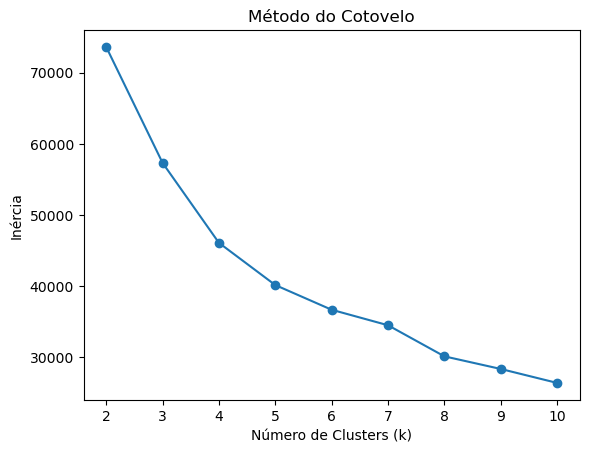

In [32]:
pca = PCA(n_components=4) 
dfPCA = pca.fit_transform(dfScalared)
dfPCA = pd.DataFrame(dfPCA, columns=["PCA1", "PCA2", "PCA3", "PCA4"])#Base de dados que será usada para os testes de validação de cluster

inertias = []
K_range = range(2, 11)  # Testa de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfPCA) 
    labels = kmeans.fit_predict(dfPCA)
    metrica = silhouette_score(dfPCA, labels)
    inertias.append(kmeans.inertia_)
    print(k, kmeans.inertia_, metrica)
    print

# Plot
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

Aqui como apartir do 4 a inercia começa a diminuir, prefiro continuar com 4 pois vou ter uma visão mais abrangente dos dados e como os dados estão sendo divididos em 3 não tem um aumento muito grande, irei continuar com os 4 cluster no Kmeans

k	AIC		BIC		Silhouette
--------------------------------------------
2	117312.1	117516.9	0.3450
3	109251.4	109562.2	0.1668
4	105801.5	106218.3	0.1290
5	103838.9	104361.6	0.1051
6	102933.4	103562.0	0.0746
7	102291.3	103025.9	0.0718
8	100974.4	101815.0	0.0697
9	100035.8	100982.4	0.0571
10	99432.2	100484.7	0.0612


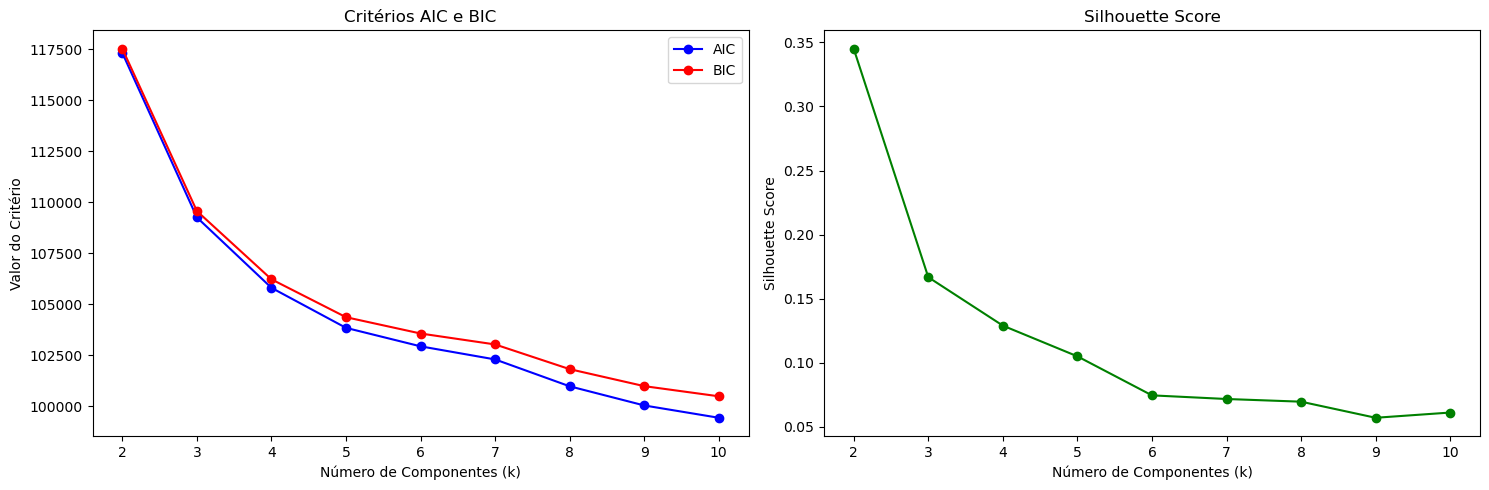

In [ ]:
# Listas para armazenar as métricas
aics = []
bics = []
silhouettes = []
K_range = range(2, 11)  # Testando de 2 a 10 componentes

print("k\tAIC\t\tBIC\t\tSilhouette")
print("--------------------------------------------")

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(dfPCA)
    labels = gmm.predict(dfPCA)
    
    # Calculando as métricas
    aic = gmm.aic(dfPCA)
    bic = gmm.bic(dfPCA)
    silhouette = silhouette_score(dfPCA, labels)
    
    # Armazenando os valores
    aics.append(aic)
    bics.append(bic)
    silhouettes.append(silhouette)
    
    print(f"{k}\t{aic:.1f}\t{bic:.1f}\t{silhouette:.4f}")

# Plotando os gráficos
plt.figure(figsize=(15, 5))

# Gráfico AIC e BIC
plt.subplot(1, 2, 1)
plt.plot(K_range, aics, 'bo-', label='AIC')
plt.plot(K_range, bics, 'ro-', label='BIC')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Valor do Critério')
plt.title('Critérios AIC e BIC')
plt.legend()
plt.xticks(K_range)

# Gráfico Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'go-')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(K_range)

plt.tight_layout()
plt.show()


In [ ]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = {}


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(dfPCA)
        
        if len(set(labels)) <= 1:
            continue
        
        score = silhouette_score(dfPCA, labels)
        print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")
        
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples}


print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

eps: 0.1, min_samples: 2, silhouette score: -0.6229659991127657
eps: 0.1, min_samples: 3, silhouette score: -0.5782953142215935
eps: 0.1, min_samples: 4, silhouette score: -0.4804219236660747
eps: 0.1, min_samples: 5, silhouette score: -0.4440622556208803
eps: 0.1, min_samples: 6, silhouette score: -0.43058204005387524
eps: 0.1, min_samples: 7, silhouette score: -0.32259470716626143
eps: 0.1, min_samples: 8, silhouette score: -0.29204713837785673
eps: 0.1, min_samples: 9, silhouette score: -0.26201432130465585
eps: 0.2, min_samples: 2, silhouette score: -0.46986766060327895
eps: 0.2, min_samples: 3, silhouette score: -0.5369769892586949
eps: 0.2, min_samples: 4, silhouette score: -0.5517467545977811
eps: 0.2, min_samples: 5, silhouette score: -0.5488115021108593
eps: 0.2, min_samples: 6, silhouette score: -0.5255528797057806
eps: 0.2, min_samples: 7, silhouette score: -0.5154071404973101
eps: 0.2, min_samples: 8, silhouette score: -0.44077013006531485
eps: 0.2, min_samples: 9, silhouet

In [65]:
bestKmeans = KMeans(n_clusters=4, random_state=42)
labelsKmeans = bestKmeans.fit_predict(dfPCA)

bestDBSCAN = DBSCAN(eps= 0.9, min_samples=6)
labelsDBSCAN = bestDBSCAN.fit_predict(dfPCA)

bestGaussianMixture = GaussianMixture(n_components=2, random_state=42)
labelsGaussianMixture = bestGaussianMixture.fit_predict(dfPCA)




In [66]:
scoreSKmeans = silhouette_score(dfPCA, labelsKmeans)
scoreSDBSCAN = silhouette_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = silhouette_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  0.2961048531646318
DBSCAN =  0.5236903604710524
GaussianMixture =  0.3449685640517226


In [67]:
scoreSKmeans = calinski_harabasz_score(dfPCA, labelsKmeans)
scoreSDBSCAN = calinski_harabasz_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = calinski_harabasz_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  3109.218219004333
DBSCAN =  1474.367554104611
GaussianMixture =  1892.1480143805675


In [68]:
scoreSKmeans = davies_bouldin_score(dfPCA, labelsKmeans)
scoreSDBSCAN = davies_bouldin_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = davies_bouldin_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  1.1268391407918246
DBSCAN =  1.5263641530323238
GaussianMixture =  1.8796863503865324
